In [32]:
#!echo 'CERO0cero' | sudo -S pip3 install imutils
#!echo 'CERO0cero' | sudo -S pip3 install --upgrade imutils

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import skimage.io as io
import argparse
import imutils

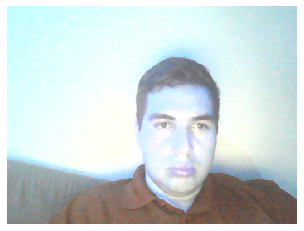

In [33]:
#Programa o codigo que captura la imagen de la camara
device = 0
cam = cv2.VideoCapture(0)
count = 1

# Se hace de forma iterativa hasta que se acaben los frames
while cam.isOpened() and count > 0:
    # Capture frame-by-frame
    ret, frame = cam.read()
    if ret == False:
        print("End of video")
        break;
    plt.axis('off')
    plt.imshow(frame)
    plt.show()
    count -= 1
 
cam.release()

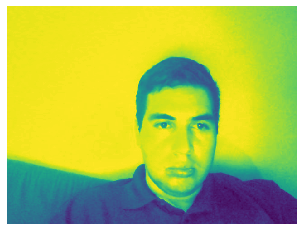

In [34]:
# Pasar la imagen a un espacio de color gris
image = frame
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(gray)
plt.show()



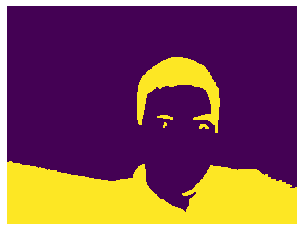

In [35]:
#Remover ruido
kernel = np.ones((3,3),dtype="uint8" )
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
plt.axis('off')
plt.imshow(opening)

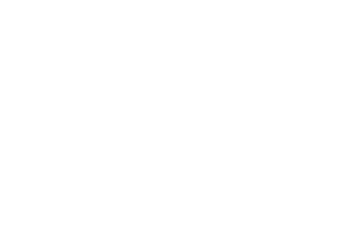

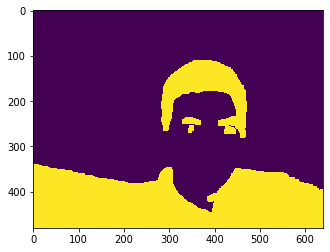

In [36]:
#Background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.axis('off')
plt.figure()
plt.imshow(sure_bg)
plt.imsave('test.jpg',sure_bg)

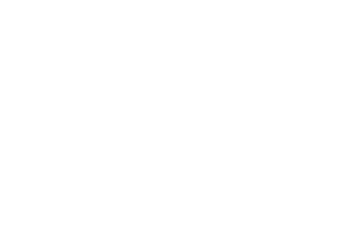

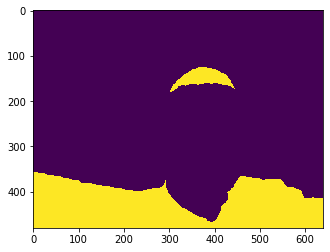

In [37]:
#finding sure foreground are
dist_transform =cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg=cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
plt.axis('off')
plt.figure()
plt.imshow(sure_fg)

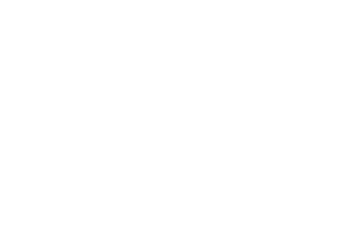

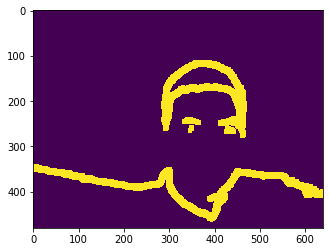

In [38]:
#finding unknow region
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
plt.axis('off')
plt.figure()
plt.imshow(unknown)

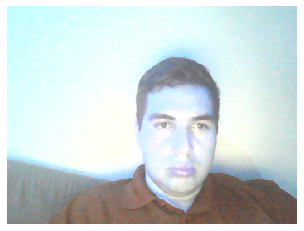

In [39]:
plt.axis('off')
plt.imshow(frame)

In [40]:
#load in your mask
mask=cv2.imread('test.jpg',0)
#get rid of quantization artifacts
mask[mask<128]=0
mask[mask>128]=1
#create output image
outputImg = frame * (mask ==1)
outputImg[mask ==0] = 255
plt.imshow(outputImg)
cv2.imwrite('new.jpg',outputImg)

ValueError: operands could not be broadcast together with shapes (480,640,3) (480,640) 